In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
hr = pd.read_csv('D:/Downloaded rcodes and datasets/HR Analytics.csv')

In [3]:
hr_dummies = pd.get_dummies(hr)
train, test = train_test_split(hr_dummies, 
                               test_size=0.3,
                              random_state=100)
train_x = train.drop('Attrition', axis=1)
test_x = test.drop('Attrition', axis=1)
train_y = train['Attrition']
test_y = test['Attrition']


In [4]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(train_x, train_y)
test_pred = model.predict(test_x)
error_rate = (test_pred != test_y).sum() / test_y.shape[0] * 100
print(error_rate)

17.46031746031746


In [54]:
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    from sklearn import tree

    import os
    graphviz_path = 'C:\program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path

    dot_data = StringIO()
    tree.export_graphviz(model,
                    out_file=dot_data,
                    feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

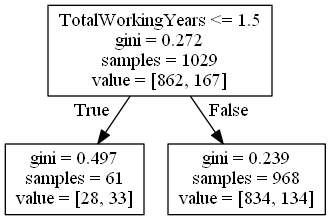

In [55]:
draw_tree(model, train_x.columns)

In [5]:
error_rates = []
for i in np.random.randint(1,30,100):
    train1, test1 = train_test_split(hr_dummies, 
                                    test_size = 0.3, 
                                    random_state=i)
    train_x = train1.drop('Attrition', axis=1)
    test_x = test1.drop('Attrition', axis=1)
    train_y = train1['Attrition']
    test_y = test1['Attrition']
    model = DecisionTreeClassifier(max_depth=1)
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
    error_rate = (test_pred != test_y).sum() / test_y.shape[0] * 100
    error_rates.append(error_rate)


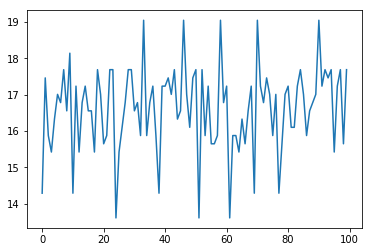

In [7]:
import matplotlib.pyplot as plt
plt.plot(error_rates)

# Training Vs Testing error

In [8]:
training_error_rates = []
testing_error_rates = []
for i in range(1,15):
    train1, test1 = train_test_split(hr_dummies, 
                                    test_size = 0.3, 
                                    random_state=60)
    train_x = train1.drop('Attrition', axis=1)
    test_x = test1.drop('Attrition', axis=1)
    train_y = train1['Attrition']
    test_y = test1['Attrition']
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
    train_pred = model.predict(train_x)
    train_error_rate = (train_pred != train_y).sum() / train_y.shape[0] * 100 
    test_error_rate = (test_pred != test_y).sum() / test_y.shape[0] * 100
    training_error_rates.append(train_error_rate)
    testing_error_rates.append(test_error_rate)


Text(0,0.5,'Error Rate')

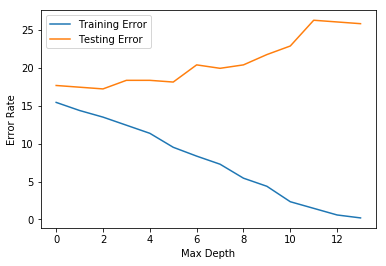

In [9]:
plt.plot(training_error_rates)
plt.plot(testing_error_rates)
plt.legend(['Training Error', 'Testing Error'])
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')

# Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

df = pd.DataFrame(columns=['criterion', 'max_depth' , 'min_samples_split'])
models = {'random_forest': [RandomForestClassifier(), {'n_estimators': [10,12,15], }],
          'decision_tree': DecisionTreeClassifier(),
          'adaboost': AdaBoostClassifier(), 
          'knn': KNeighborsClassifier(),
          'naive_bayes': GaussianNB()}
for name, model in models.items():
    print(name)
    params = {'max_depth': list(range(1, 11)),
             'criterion': ['gini','entropy'],
             'min_samples_split':[6,10,20,12,2,3,4]}
    params1 = {'n_estimators': [15],
              'learning_rate':[1.0],
              'algorithm':['SAMME.R']}
    if(name =='adaboost'):
        print('---adaboost-')
        tree_cv = GridSearchCV(model, param_grid=params1)
    else:
        print('=========')
        tree_cv = GridSearchCV(model, param_grid=params)
        
    tree_cv.fit(train_x, train_y)
    e = tree_cv.best_params_
    print(model,e)
    df.append(e, ignore_index=True)

random_forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 12}
decision_tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 6}
adaboost
---adaboost-
AdaBoostClassifier(algorithm='SAMME.R', base_estima

ValueError: Invalid parameter criterion for estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.